# Gradient Descent with AdaGrad and RMSProp

## Objective Function and Gradient

### 1. 3D Plot of the Test Function

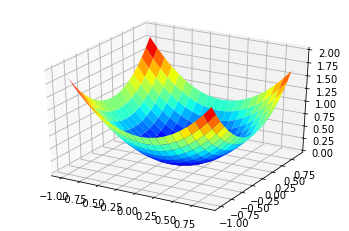

In [ ]:
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

def objective(x, y):
  return x**2.0 + y**2.0 

r_min, r_max = -1.0,  1.0
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, results, cmap='jet')
pyplot.show()


### 2. Contour Plot of the Test Function

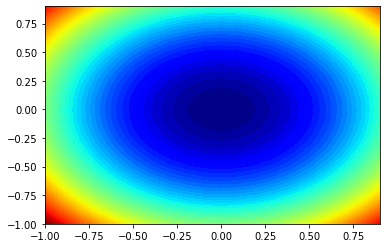

In [ ]:
# contour plot of the test function
from numpy import asarray
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

def objective(x, y):
  return x**2.0 + y**2.0 
bounds = asarray([[-1, 1], [-1, 1]])
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
pyplot.contourf(x, y, results, levels=50, cmap='jet')
pyplot.show()

## Gradient Descent with AdaGrad

### 3. Gradient descent optimization with adagrad for a two-dimensional test function


In [ ]:
# gradient descent optimization with adagrad for a two-dimensional test function
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed 
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

#	objective function
def objective(x, y):
  return x**2.0 + y**2.0
#	derivative of objective function def derivative(x, y):
def derivative(x, y):
  return asarray([x * 2.0, y * 2.0])
# gradient descent algorithm with adagrad
def adagrad(objective, derivative, bounds, n_iter, step_size):
  # track all solutions
  solutions = list()
  # generate an initial point
  solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  # list of the sum square gradients for each variable 
  sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
  # run the gradient descent
  for it in range(n_iter):
    # calculate gradient
    gradient = derivative(solution[0], solution[1])
    # update the sum of the squared partial derivatives 
    for i in range(gradient.shape[0]):
      sq_grad_sums[i] += gradient[i]**2.0
    # build solution
    new_solution = list()
    for i in range(solution.shape[0]):
      # calculate the learning rate for this variable 
      alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
      # calculate the new position in this variable 
      value = solution[i] - alpha * gradient[i]
      new_solution.append(value)
    # store the new solution
    solution = asarray(new_solution)
    solutions.append(solution)
    # evaluate candidate point
    solution_eval = objective(solution[0], solution[1])
    # report progress
    print('>%d f(%s) . %.5f' % (it, solution, solution_eval)) 
  return solutions

### 4. Plotting the adagrad search on a contour plot of the test function

>0 f([-0.06595602  0.340649  ]) . 0.12039
>1 f([-0.02886236  0.27929536]) . 0.07884
>2 f([-0.01276125  0.23417693]) . 0.05500
>3 f([-0.00562466  0.19863849]) . 0.03949
>4 f([-0.00246486  0.16964301]) . 0.02878
>5 f([-0.00107332  0.145492  ]) . 0.02117
>6 f([-0.00046434  0.12511178]) . 0.01565
>7 f([-0.00019955  0.10776512]) . 0.01161
>8 f([-8.51860635e-05  9.29147925e-02]) . 0.00863
>9 f([-3.61188240e-05  8.01516212e-02]) . 0.00642
>10 f([-1.52095444e-05  6.91533161e-02]) . 0.00478
>11 f([-6.36034309e-06  5.96594573e-02]) . 0.00356
>12 f([-2.64113212e-06  5.14554696e-02]) . 0.00265
>13 f([-1.08894956e-06  4.43619097e-02]) . 0.00197
>14 f([-4.45754295e-07  3.82270235e-02]) . 0.00146
>15 f([-1.81140176e-07  3.29213925e-02]) . 0.00108
>16 f([-7.30678086e-08  2.83339599e-02]) . 0.00080
>17 f([-2.92542666e-08  2.43689933e-02]) . 0.00059
>18 f([-1.16242022e-08  2.09437034e-02]) . 0.00044
>19 f([-4.58359298e-09  1.79863337e-02]) . 0.00032
>20 f([-1.79339171e-09  1.54345976e-02]) . 0.00024
>21

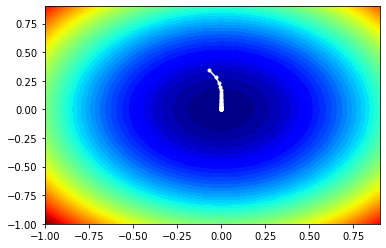

In [ ]:
# example of plotting the adagrad search on a contour plot of the test function

# seed the pseudo random number generator
seed(1)
# define range for input 
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size 
step_size = 0.01
# momentum for rmsprop 
rho = 0.99
# perform the gradient descent search with rmsprop 
solutions = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)
# sample input range uniformly at 0.1 increments 
xaxis = arange(bounds[0,0], bounds[0,1], 0.1) 
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme 
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='W')
# show the plot
pyplot.show()

## Gradient Descent with RMSProp

### 5. Gradient descent optimization with rmsprop for a two-dimensional test function

In [ ]:
# gradient descent optimization with rmsprop for a two-dimensional test function
from math import sqrt 
from numpy import asarray 
from numpy import arange 
from numpy.random import rand
from numpy.random import seed 
from numpy import meshgrid 
from matplotlib import pyplot 
from mpl_toolkits.mplot3d import Axes3D 
# objective function 
def objective(x, y): 
  return x**2.0 + y**2.0 
# derivative of objective function 
def derivative(x, y): 
  return asarray([x * 2.0, y * 2.0]) 

# gradient descent algorithm with rmsprop
def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
  # track all solutions
  solutions = list()
  # generate an initial point
  solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  # list of the average square gradients for each variable 
  sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
  # run the gradient descent
  for it in range(n_iter):
    #  calculate gradient
    gradient = derivative(solution[0], solution[1])
    #  update the average of the squared partial derivatives 
    for i in range(gradient.shape[0]):
       # calculate the squared gradient
       sg = gradient[i]**2.0
       # update the moving average of the squared gradient 
       sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))
    #  build solution
    new_solution = list()
    for i in range(solution.shape[0]):
       # calculate the learning rate for this variable 
       alpha = step_size / (1e-8 + sqrt(sq_grad_avg[i]))
       # calculate the new position in this variable 
       value = solution[i] - alpha * gradient[i]
       new_solution.append(value)
    #  store the new solution
    solution = asarray(new_solution)
    solutions.append(solution)
    #  evaluate candidate point
    solution_eval = objective(solution[0], solution[1])
    #  report progress
    print('>%d f(%s) . %.5f' % (it, solution, solution_eval)) 
  return solutions

### 6. Plotting the rmsprop search on a contour plot of the test function

>0 f([-0.06595599  0.34064899]) . 0.12039
>1 f([-0.02902286  0.27948766]) . 0.07896
>2 f([-0.0129815   0.23463749]) . 0.05522
>3 f([-0.00582483  0.1993997 ]) . 0.03979
>4 f([-0.00261527  0.17071256]) . 0.02915
>5 f([-0.00117437  0.14686138]) . 0.02157
>6 f([-0.00052736  0.12676134]) . 0.01607
>7 f([-0.00023681  0.10966762]) . 0.01203
>8 f([-0.00010634  0.09503809]) . 0.00903
>9 f([-4.77542704e-05  8.24607972e-02]) . 0.00680
>10 f([-2.14444463e-05  7.16123835e-02]) . 0.00513
>11 f([-9.62980437e-06  6.22327049e-02]) . 0.00387
>12 f([-4.32434258e-06  5.41085063e-02]) . 0.00293
>13 f([-1.94188148e-06  4.70624414e-02]) . 0.00221
>14 f([-8.72017797e-07  4.09453989e-02]) . 0.00168
>15 f([-3.91586740e-07  3.56309531e-02]) . 0.00127
>16 f([-1.75845235e-07  3.10112252e-02]) . 0.00096
>17 f([-7.89647442e-08  2.69937139e-02]) . 0.00073
>18 f([-3.54597657e-08  2.34988084e-02]) . 0.00055
>19 f([-1.59234984e-08  2.04577993e-02]) . 0.00042
>20 f([-7.15057749e-09  1.78112581e-02]) . 0.00032
>21 f([-3.2

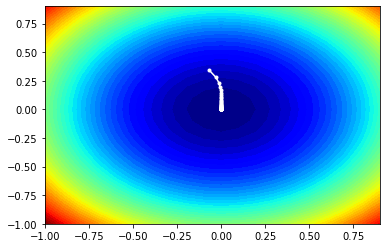

In [ ]:
# example of plotting the rmsprop search on a contour plot of the test function

# seed the pseudo random number generator 
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions = adagrad(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments 
xaxis = arange(bounds[0,0], bounds[0,1], 0.1) 
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme 
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='W')
# show the plot
pyplot.show()